# Chapter 08 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Example: Marriage therapy

In [3]:
observed = pd.DataFrame({
    "B": {1: 15, 2: 3, 3: 11},
    "I": {1: 24, 2: 5, 3: 1},
}).transpose()

# use scipy.stats.chi2_contingency to determine expected values
result = stats.chi2_contingency(observed)
print(result.expected_freq)
# calculate sum of absolute differences
np.abs(observed - result.expected_freq).sum().sum()

[[19.16949153  3.93220339  5.89830508]
 [19.83050847  4.06779661  6.10169492]]


20.40677966101695

 Resampling procedure

In [4]:
from collections import Counter
random.seed(123)
box = [1] * 39 + [2] * 8 + [3] * 12
statistics = []
for _ in range(10_000):
    random.shuffle(box)
    resample_B = box[:29]
    resample_I = box[29:]
    counts_B = Counter(resample_B)
    counts_I = Counter(resample_I)
    table = pd.DataFrame({
        "B": {i: counts_B[i] for i in [1, 2, 3]},
        "I": {i: counts_I[i] for i in [1, 2, 3]},
    }).transpose()
    statistic = np.abs(table - result.expected_freq).sum().sum()
    statistics.append(statistic)

statistics = np.array(sorted(statistics, reverse=True))
count_above = sum(statistics > 20.42)
p_value = count_above / len(statistics)

print(f"observed: {np.abs(observed - result.expected_freq).sum().sum():.2f}")
print(f"count above: {count_above}")
print(f"p-value: {p_value:.4f}")

observed: 20.41
count above: 65
p-value: 0.0065


In [5]:
random.seed(123)
box = [1] * 39 + [2] * 8 + [3] * 12
random.shuffle(box)
resample_B = box[:29]
resample_I = box[29:]
counts_B = Counter(resample_B)
counts_I = Counter(resample_I)
table = pd.DataFrame({
    "B": {i: counts_B[i] for i in [1, 2, 3]},
    "I": {i: counts_I[i] for i in [1, 2, 3]},
}).transpose()
print("Shuffled box")
print(" & ".join([str(i) for i in box]))
print(table)
print(result.expected_freq)
print(np.abs(table - result.expected_freq))
print(np.abs(table - result.expected_freq).sum().sum())

Shuffled box
3 & 1 & 3 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 3 & 2 & 1 & 1 & 1 & 1 & 2 & 2 & 1 & 1 & 1 & 1 & 3 & 1 & 2 & 3 & 1 & 2 & 1 & 1 & 1 & 1 & 1 & 3 & 3 & 1 & 1 & 2 & 1 & 2 & 3 & 2 & 1 & 1 & 3 & 3 & 1 & 1 & 1 & 1 & 1 & 1 & 3 & 1 & 3 & 1 & 1 & 1
    1  2  3
B  19  5  5
I  20  3  7
[[19.16949153  3.93220339  5.89830508]
 [19.83050847  4.06779661  6.10169492]]
          1         2         3
B  0.169492  1.067797  0.898305
I  0.169492  1.067797  0.898305
4.271186440677969


 Show a values in the vicinity of the observed value

In [6]:
at_threshold = np.where(statistics <= 20.42)[0][0]
for i in range(-5, 5):
    print(f"{at_threshold + i + 1} : {statistics[at_threshold + i]:.3f}")

61 : 20.678
62 : 20.678
63 : 20.678
64 : 20.678
65 : 20.678
66 : 20.407
67 : 20.407
68 : 20.407
69 : 19.593
70 : 19.593


# Chi-Square Example

In [7]:
result = stats.chi2_contingency(observed)
print(f"chi2 = {result.statistic:.3f}")
print(f"p-value = {result.pvalue:.4f}")
print(f"degrees of freedom = {result.dof}")
print("expected")
print(result.expected_freq)

chi2 = 10.896
p-value = 0.0043
degrees of freedom = 2
expected
[[19.16949153  3.93220339  5.89830508]
 [19.83050847  4.06779661  6.10169492]]


# Benford's law

 Following the equation in the Wikipedia article, we can

   digit  expected
0      1  0.301030
1      2  0.176091
2      3  0.124939
3      4  0.096910
4      5  0.079181
5      6  0.066947
6      7  0.057992
7      8  0.051153
8      9  0.045757


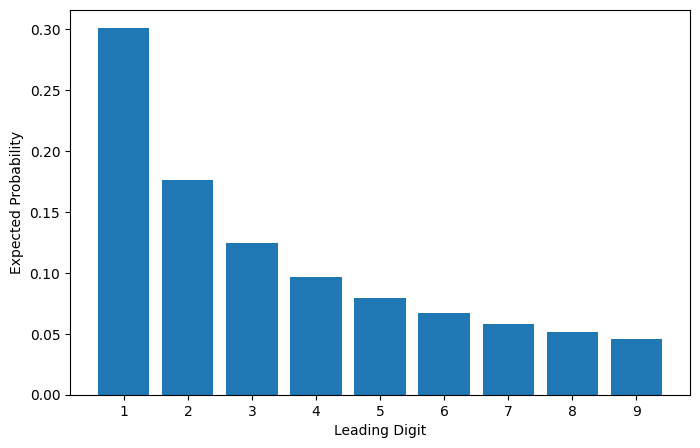

In [8]:
digits = np.arange(1, 10)
benford = pd.DataFrame({
    "digit": digits,
    "expected": np.log10(1 + 1/digits),
})
print(benford)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(benford["digit"], benford["expected"])
ax.set_xticks(digits)
ax.set_xlabel("Leading Digit")
ax.set_ylabel("Expected Probability")
plt.show()

# Resampling distributions of interior digits

 Look at an example of a resampling distribution of interior digits.

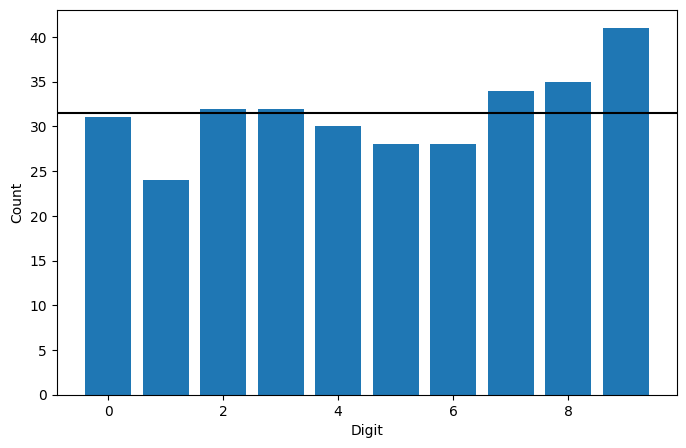

In [9]:
from collections import Counter

random.seed(123)
box = list(range(10))
random.shuffle(box)
resample = random.choices(box, k=315)
counts = Counter(resample)
df = pd.DataFrame({
    "count": [counts[i] for i in range(10)],
}, index=range(10))

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(df.index, df["count"])
ax.axhline(31.5, color="black")
ax.set_xlabel("Digit")
ax.set_ylabel("Count")
plt.show()

 Resampling experiment

In [10]:
random.seed(123)
box = list(range(10))
differences = []
for _ in range(10_000):
    random.shuffle(box)
    resample = random.choices(box, k=315)
    counts = Counter(resample)
    df = pd.DataFrame({
        "count": [counts[i] for i in range(10)],
    }, index=range(10))
    differences.append(sum(abs(df["count"] - 31.5)))
differences = np.array(differences)
above_216 = sum(differences >= 216)
p_value = above_216 / len(differences)

print(f"Number of resamples with sum of absolute deviations >= 216:{above_216}")
print(f"p-value = {p_value:.4f}")

Number of resamples with sum of absolute deviations >= 216:0
p-value = 0.0000


# ANOVA of fat absorption data

 Load required packages

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

 Prepare dataset

In [12]:
fat_absorption = pd.DataFrame([
    [1, 164, 178, 175, 155],
    [2, 172, 191, 193, 166],
    [3, 168,  197,  178,  149],
    [4,  177,  182,  171,  164],
    [5,  156,  185,  163,  170],
    [6,  195,  177,  176, 168],
], columns=["Replication", "Fat 1", "Fat 2", "Fat 3", "Fat 4"])

## Exploratory data analysis

 Dotplot

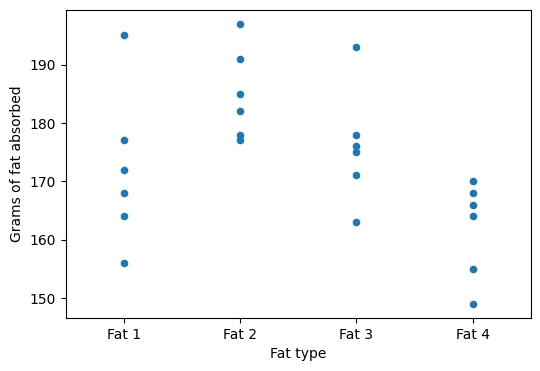

In [13]:
fats = ["Fat 1", "Fat 2", "Fat 3", "Fat 4"]

# convert from wide to long format for plotting
fat_long = fat_absorption.melt(value_vars=fats)

fig, ax = plt.subplots(figsize=(6, 4))
fat_long.plot.scatter(x="variable", y="value", ax=ax)
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(-0.5, 3.5)
plt.show()

 Boxplots

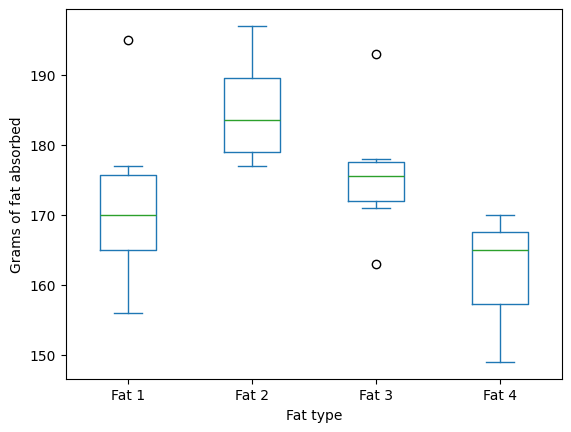

In [14]:
ax = fat_absorption[fats].plot.box()
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(0.5, 4.5)
plt.show()

In [15]:
fat_average = fat_absorption[fats].mean(axis=0)
grand_average = fat_absorption[fats].to_numpy().mean()
deviation = fat_average - grand_average
print(deviation)
deviation_squared = deviation ** 2
print(deviation_squared)
total_deviation = deviation_squared.sum()
print(total_deviation)
variance = total_deviation / (len(fats) - 1)
print(variance)

Fat 1    -1.75
Fat 2    11.25
Fat 3     2.25
Fat 4   -11.75
dtype: float64
Fat 1      3.0625
Fat 2    126.5625
Fat 3      5.0625
Fat 4    138.0625
dtype: float64
272.75
90.91666666666667


## Resampling procedure to compare means

In [16]:
random.seed(123)

# step 1
data = fat_absorption[fats].to_numpy()
box = list(data.flatten())

shuffled_vars = []
for _ in range(1_000):
    # step 2
    # shuffle the box and convert to same format as original
    # dataset
    shuffled = random.sample(box, k=len(box))
    shuffled_data = np.reshape(shuffled, data.shape)

    # step 3
    # determine means of shuffled data
    shuffled_means = shuffled_data.mean(axis=0)

    # step 4
    # calculate variance of means
    shuffled_var = np.var(shuffled_means, ddof=1)
    shuffled_vars.append(shuffled_var)
shuffled_above_threshold = sum(shuffled_vars > variance)
resampled_p_value = shuffled_above_threshold / len(shuffled_vars)

for resampled_var in sorted(shuffled_vars, reverse=True)[:10]:
    print(f"{resampled_var:.3f}")
print()
print(f"Resampled p-value: {resampled_p_value:.4f}")

128.602
113.639
111.954
104.750
100.750
98.157
91.046
90.602
87.361
86.491

Resampled p-value: 0.0070


 Visualize the resmapled variances in a histogram

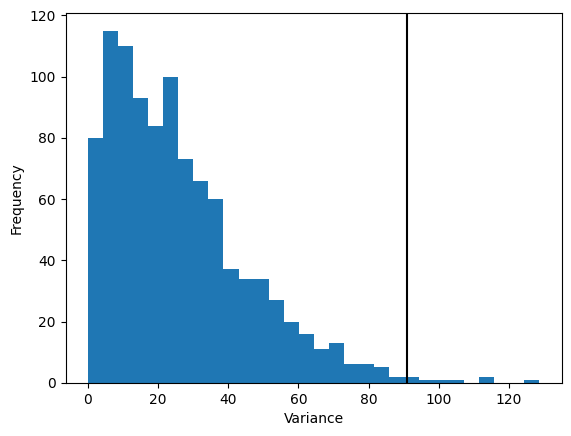

In [17]:
ax = pd.Series(shuffled_vars).plot.hist(bins=30)
ax.set_xlabel("Variance")
ax.axvline(variance, color="black")
plt.show()

## Components of variance

 Calculate averages for each fat and grand average

In [18]:
fat_average = fat_absorption[fats].mean(axis=0)
grand_average = fat_absorption[fats].to_numpy().mean()

print("Average for fats")
print(fat_average)
print(f"Grand average: {grand_average}")

Average for fats
Fat 1    172.0
Fat 2    185.0
Fat 3    176.0
Fat 4    162.0
dtype: float64
Grand average: 173.75


## Constructing the Factor Diagram

In [19]:
factor_observations = fat_absorption[fats]
factor_grand_average = factor_observations.copy()
factor_grand_average[:] = grand_average
factor_treatment_effects = factor_observations.copy()
factor_treatment_effects[:] = fat_average - grand_average

factor_residual_error = factor_observations - factor_grand_average - factor_treatment_effects
factor_observations, factor_grand_average, factor_treatment_effects, factor_residual_error

/var/folders/_8/ms0ft4913k3290v7f0g_yfpc0000gn/T/ipykernel_10966/1063467892.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '173.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  factor_grand_average[:] = grand_average
/var/folders/_8/ms0ft4913k3290v7f0g_yfpc0000gn/T/ipykernel_10966/1063467892.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '173.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  factor_grand_average[:] = grand_average
/var/folders/_8/ms0ft4913k3290v7f0g_yfpc0000gn/T/ipykernel_10966/1063467892.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '173.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  factor_grand_average[:] = gra

(   Fat 1  Fat 2  Fat 3  Fat 4
 0    164    178    175    155
 1    172    191    193    166
 2    168    197    178    149
 3    177    182    171    164
 4    156    185    163    170
 5    195    177    176    168,
     Fat 1   Fat 2   Fat 3   Fat 4
 0  173.75  173.75  173.75  173.75
 1  173.75  173.75  173.75  173.75
 2  173.75  173.75  173.75  173.75
 3  173.75  173.75  173.75  173.75
 4  173.75  173.75  173.75  173.75
 5  173.75  173.75  173.75  173.75,
    Fat 1  Fat 2  Fat 3  Fat 4
 0  -1.75  11.25   2.25 -11.75
 1  -1.75  11.25   2.25 -11.75
 2  -1.75  11.25   2.25 -11.75
 3  -1.75  11.25   2.25 -11.75
 4  -1.75  11.25   2.25 -11.75
 5  -1.75  11.25   2.25 -11.75,
    Fat 1  Fat 2  Fat 3  Fat 4
 0   -8.0   -7.0   -1.0   -7.0
 1    0.0    6.0   17.0    4.0
 2   -4.0   12.0    2.0  -13.0
 3    5.0   -3.0   -5.0    2.0
 4  -16.0    0.0  -13.0    8.0
 5   23.0   -8.0    0.0    6.0)

In [20]:
ssq_grand_average = (factor_grand_average**2).sum().sum()
ssq_treatment_effects = (factor_treatment_effects**2).sum().sum()
ssq_residual_error = (factor_residual_error**2).sum().sum()
print(ssq_grand_average)
print(ssq_treatment_effects)
print(ssq_residual_error)

724537.5
1636.5
2018.0


In [21]:
df_treatment = len(fats) - 1
df_residual = len(fats) * (len(fat_absorption) - 1)
var_treatment_effects = ssq_treatment_effects / df_treatment
var_residual_error = ssq_residual_error / df_residual
F_statistic = var_treatment_effects / var_residual_error
p_value = 1 - stats.f.cdf(F_statistic, df_treatment, df_residual)

print(f"Variance treatment {var_treatment_effects}")
print(f"Variance residual {var_residual_error}")
print(f"F-statistic {F_statistic:.6f}")
print(f"p-value {p_value:.4f}")

Variance treatment 545.5
Variance residual 100.9
F-statistic 5.406343
p-value 0.0069


## ANOVA using statsmodels

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_model = ols("value ~ C(variable)", data=fat_long).fit()
sm.stats.anova_lm(ols_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),3.0,1636.5,545.5,5.406343,0.006876
Residual,20.0,2018.0,100.9,NaN,NaN


## ANOVA using scipy

In [23]:
stats.f_oneway(fat_absorption["Fat 1"], fat_absorption["Fat 2"], fat_absorption["Fat 3"], fat_absorption["Fat 4"])
stats.f_oneway(*[fat_absorption[fat] for fat in fats])

F_onewayResult(statistic=5.406342913776015, pvalue=0.0068759477547351)

# F-distribution

In [24]:
from scipy import stats
x = 5.406
print(f"p-value {1 - stats.f.cdf(x, 3, 20):.4f}")
print(f"p-value {stats.f.sf(x, 3, 20):.4f}")

p-value 0.0069
p-value 0.0069


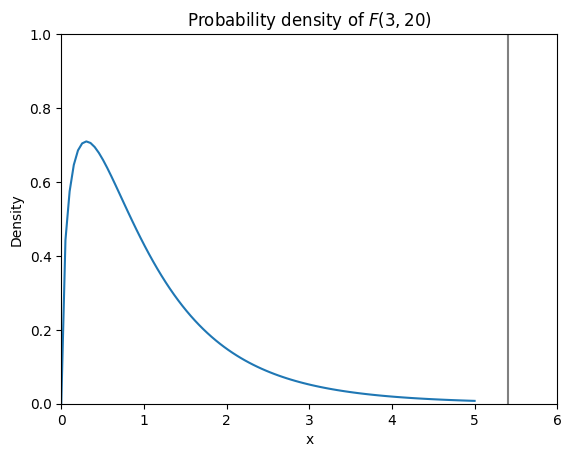

In [25]:
x = np.linspace(0, 5, 100)
df = pd.DataFrame({
    "x": x,
    "f-pdf": stats.f.pdf(x, 3, 20),
    "1-cdf": 1 - stats.f.cdf(x, 3, 20),
})
ax = df.plot(x="x", y="f-pdf", legend=False)
ax.axvline(x=F_statistic, color="grey")
ax.set_ylabel("Density")
ax.set_ylim(0, 1)
ax.set_xlim(0, 6)
ax.set_title("Probability density of $F(3, 20)$")
plt.show()

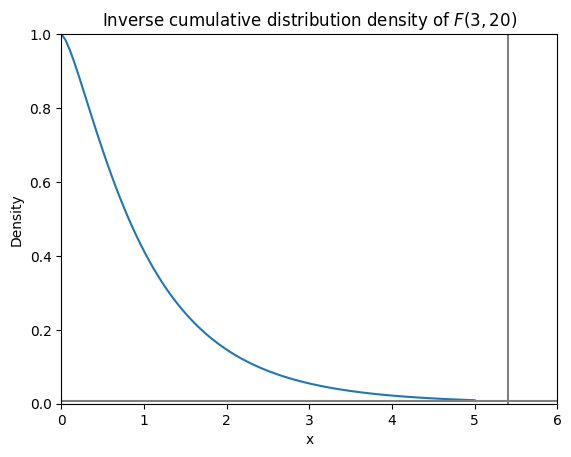

In [26]:
ax = df.plot(x="x", y="1-cdf", legend=False)
ax.axvline(x=F_statistic, color="grey")
ax.axhline(y=p_value, color="grey")
ax.set_ylabel("Density")
ax.set_ylim(0, 1)
ax.set_xlim(0, 6)
ax.set_title("Inverse cumulative distribution density of $F(3, 20)$")
plt.show()